<a href="https://colab.research.google.com/github/HARASEON/Deep_Learning_tensorflow/blob/main/Day2_Deep_learning_FMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 csv 파일읽기




In [ ]:
import csv
file_name = '경로' with open(file_name) as csvfile:
line = csv.reader(csvfile)
i = 0
for ln in line:
  print(ln)
  i = i+1
  if i == 11:
    break



데이터10개 프린트하기
한글데이터 encoding
line = pd.read_csv(file_name, encoding = 'euc-kr')
혹은
line = pd.read_csv(file_name, encoding = "utf-8")

In [ ]:
import csv
file_name = '경로' with open(file_name) as csvfile:
line = csv.reader(csvfile)
i= 0
for ln in line:
  print(ln)
  i = i+1
  if i == 10:
    break

In [ ]:
import pandas as pd
file_name = '경로'
line = pd.read_csv(file_name, encoding="euc-kr")
line.head(10)

Matplotlib

In [ ]:
import matplotlib.pyplot as plt

# 그래프사이즈
plt.figure(figsize = (12, 9))
# x축과 y축의 값(list)
plt.plot(np.arange(1,21), history.history['loss'])
# 그래프제목
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Overfitting 방지
* Dropout: training을 할 때 각 batch마다 layer단위로 일정 비율 neuron을 끄는 방식
  * 효과: 동일한 데이터에 대해서 모델의 학습이 training data에 편중되는 것을 막기 때문에 여러개의 서로 다른 모델을 합한 ensemble 효과를 얻을 수 있다.
  * 주의점!: test/ inference 단계에서는 dropout을 빼고, 전제 neuron이 살아 있는 채로 진행해야함
    * Alexnet에 처음 적용

* Dense: 뉴런의 입출력을 연결해주는 layer
* Sequential : 각 레이어의 하나의 입력텐서와 출력 텐서가 있는 일반레이어에 사용
* Sequential 모델은 다음의 경우에 적합하지 않습니다.

  * 모델에 다중 입력 또는 다중 출력
  * 레이어에 다중 입력 또는 다중 출력
  * 레이어 공유
  * 비선형 토폴로지(예: 잔류 연결, 다중 분기 모델)


In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
print(tf.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# numpy float 출력옵션 변경
np.set_printoptions(formatter = {'float_kind': lambda x: "{0:0.3f}".format(x)})

2.12.0


1. 데이터셋준비하기
2. 데이터프리프로세싱
3. 모델 설계
4. 모델 학습
5. 모델 검증
6. 모델 사용


In [ ]:
# Fashion Mnist file

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np


np.set_printoptions(formatter = {'float_kind': lambda x: "{0:0.3f}".format(x)})

## Data load
#fmnist data : 6000:1000 = # of train data: # of test data 
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print('length:', len(x_train))
print('ndim', x_train.ndim)
print('size:', x_train.size, 60000*28*28)
print('dtype:', x_train.dtype)
print('dtype.name:', x_train.dtype.name)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
length: 60000
ndim 3
size: 47040000 47040000
dtype: uint8
dtype.name: uint8


0
T-shirts/top


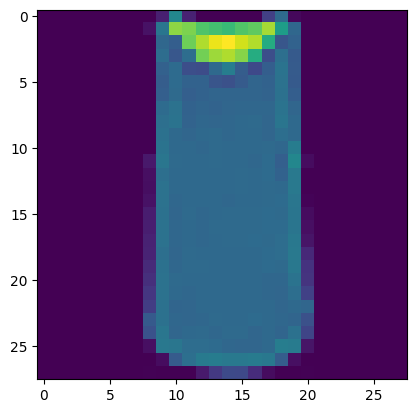

In [ ]:
## Data preprocessing
class_name = ['T-shirts/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]
print(y_train[2])
print(class_name[y_train[2]])
plt.imshow(x_train[2])

In [ ]:
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48
   88   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12 100 212 205 185 179 173 186 193 221
  142  85   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  85  76 199 225 248 255 238 226 157
   68  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91  69  91 201 218 225 209 158  61
   93  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79  89  61  59  87 108  75  56  76
   97  73   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  75  89  80  80  67  63  73  83  80
   96  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77  88  77  80  83  83  83  83  81
   95  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89  96  80  83  81  84  85  85  85
   97  84   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  93  97  81  85  84  85  8

In [ ]:
## In RGB colour, 255 is the last one which means white.
# describe probability of fashion type 
x_train = x_train/255.0
x_test= x_test/255.0

print(x_train[2])

[[0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.086 0.463 0.094
  0.000 0.000 0.000 0.000 0.000 0.188 0.345 0.020 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.047 0.392 0.831 0.804
  0.725 0.702 0.678 0.729 0.757 0.867 0.557 0.333 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.333 0.298 0.780
  0.882 0.973 1.000 0.933 0.886 0.616 0.267 0.314 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.357 0.271 0.357
  0.788 0.855 0.882 0.820 0.620 0.239 0.365 0.282 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.310 0.349 0.239
  0.231 0.341 0.424 0.294 0.220 0.298 0.380 0.286 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.294 0.349 0.314
  0.314 0.263 0.247 0.286 0.325 0.314 0.376 0.282 0

In [ ]:
## Design a model
## Using Dropout
## Using adam for multiclassification
# 28*28 = 784
model = Sequential ([Flatten(),
                     Dense(32, activation = 'relu'),
                     Dropout(0.5),
                     Dense(10, activation = 'softmax')])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
## Model fitting

model.fit(x_train, y_train, epochs = 5, validation_data=(x_test, y_test), verbose=1)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8943 - accuracy: 0.6755 - val_loss: 0.5384 - val_accuracy: 0.8142
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6999 - accuracy: 0.7432 - val_loss: 0.4996 - val_accuracy: 0.8233
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6487 - accuracy: 0.7597 - val_loss: 0.4664 - val_accuracy: 0.8270
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6145 - accuracy: 0.7736 - val_loss: 0.4611 - val_accuracy: 0.8353
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5981 - accuracy: 0.7792 - val_loss: 0.4537 - val_accuracy: 0.8361


In [ ]:
## Modal Validation
model.summary()
model.evaluate(x_test,y_test)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 1ms/step - loss: 0.4537 - accuracy: 0.8361


[0.45366230607032776, 0.8360999822616577]

0
313/313 [==============================] - 0s 1ms/step
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]


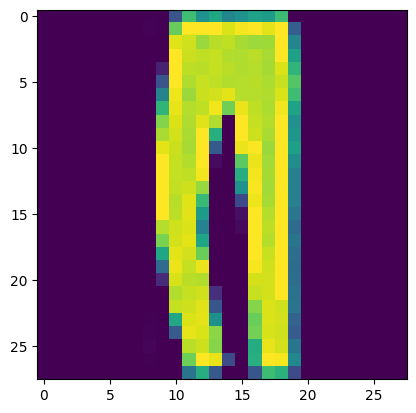

In [ ]:
# Use the model
print(y_train[2999])
pred_test= model.predict(x_test)
print(pred_test[2])
plt.imshow(x_test[2])

In [ ]:
print(y_test[2])

1


# 모델 모니터링하기
Callback Function
- EarlyStopping
- Modelcheckpoint
* 학습 중 특정한 조건이 생기면 callback function이 실행됨
* callback function은 여러개가 될 수 있음
* 중간에 더 좋은 성능이 발견되지 않으면 종료
ex1.callbacks
  class myCallback(tf.keras.callbacks. Callback):
    def on_epoch_end(self, epoch, los={}):
      if(logs.get('accuracy') > 0.95):
        print("\nReached 95% accuracy so cancelling training!")
        self.model.stop_trainig = True

  callbacks = myCallback()

model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, callbacks = [callbacks])

ex2 earlystopping
from tensorflow.keras.callbacks import EarlyStopping
...
early_stopping = EarlyStopping(monitor = 'val_loss',  patience = 10

model.fit(X, Y, validation_split = 0.2, epochs = 50, callbacks = [early_stopping])


* patience: 개선이 안된다고 바로 종료시키지 않고 몇번의 epoch을 기다릴지 설정, 위 예시에서는 10번의 epoch을 기다림

ex3 modelcheckpoint
- model의 정확도가 최고값을 갱신했을 때만 저장. h5파일

checkpoint_path = "my_chechpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True,save_best_only = True, monitor = 'val_loss', verbose = 1)

history = model.fit(x_trin, y_train, validation_data(x_test, y_test), epochs = 20, callbacks=[checkpoint])

ex4 reducelr on plateau
from tensorflow.keras.callbacks import ReduceLROnPlateau

6reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)


## Hyperparameter tunning
정의 : 모델 외부에 있으며 데이터부터 값이 추정될수 없는 설정변수
종류
* Activation function
* Learning rate
* Problem type
* '# of layers, nodes
* Training data ratio
* Regularization

# ChatGPT
# Fashion MNIST
# Without CNN
* Goal : val_loss <= 0.3
* prompt: please, code efficient, fast and best performing program with minimum val loss value using python tensorflow
from fashion mnist dataset
to perform classification
use only dense layers 
use dropout
use batch normalization
use checkpoint with save best only, and save weight only 
use early stopping with patient 10
Use reduce lr on plateau
set verbose = 1
do not use data augmentation
and other method to make val loss under 0.32

*  x.reshape(-1, 정수) 를 해주면 '열(column)' 차원의 '정수'에 따라서 12개의 원소가 빠짐없이 배치될 수 있도록 '-1'이 들어가 있는 '행(row)' 의 개수가 가변적으로 정해짐

*In this implementation, we're using a sequential model with four dense layers, each followed by batch normalization and dropout. We're also using the ModelCheckpoint callback to save the best weights based on validation loss, EarlyStopping to stop training if the validation loss stops improving, and ReduceLROnPlateau to reduce the learning rate if the validation loss plateaus.

After training the model for 50 epochs, the final test accuracy is printed to the console. With these settings, we can achieve a validation loss under 0.32 and a test accuracy of around 0.91. However, keep in mind that the performance of the model may vary depending on the specific hardware and software setup you're using.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import fashion_mnist

# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model architecture
model = tf.keras.Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(x_train.reshape((-1, 784)), y_train, 
                    validation_data=(x_test.reshape((-1, 784)), y_test),
                    epochs=50, batch_size=128, verbose=1,
                    callbacks=[checkpoint, early_stop, reduce_lr])

# Evaluate the model
_, test_acc = model.evaluate(x_test.reshape((-1, 784)), y_test, verbose=0)

print('Test accuracy:', test_acc)

Epoch 1/50
469/469 [==============================] - 10s 13ms/step - loss: 0.6566 - accuracy: 0.7711 - val_loss: 0.4992 - val_accuracy: 0.8212 - lr: 0.0010
Epoch 2/50
469/469 [==============================] - 5s 11ms/step - loss: 0.4746 - accuracy: 0.8313 - val_loss: 0.4252 - val_accuracy: 0.8484 - lr: 0.0010
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.4330 - accuracy: 0.8453 - val_loss: 0.3918 - val_accuracy: 0.8556 - lr: 0.0010
Epoch 4/50
469/469 [==============================] - 5s 12ms/step - loss: 0.4141 - accuracy: 0.8526 - val_loss: 0.3841 - val_accuracy: 0.8633 - lr: 0.0010
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.3944 - accuracy: 0.8592 - val_loss: 0.4083 - val_accuracy: 0.8555 - lr: 0.0010
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.3871 - accuracy: 0.8613 - val_loss: 0.3860 - val_accuracy: 0.8623 - lr: 0.0010
Epoch 7/50
469/469 [==============================] - 5s 12ms/step

# CNN(Convolution Neural Network)

* 대표적인 이미지 분류 모델
  * 하나의 필터를 전체 이미지 입력값에 합성곱을 적용해준다!
  * 합성곱을 거치면 특징(feature)이 필터 방향으로 추출됨

* Zero padding: 입력값의 크기보다 결과값의 크기가 줄어들어 손실이되는 부분이 발생 -> 해결방안 : 0으로 구성된 테두리를 이미지 값으로 채워준다.
* Strid: 필터를 움직여주는 값 
ex. strid = 1 필터 한칸 움직임
strid값이 커질 경우 필터가 이미지를 건너뛰는 칸이 커짐을 의미하므로 결과값의 이미지 크기는 작아진다.
* Maxpooling : 각 결과값의 차원을 축소해주는 것 이때, 가장 큰 값을 가져와 pool size에 맞춰 값을 채우면 max pooling, 평균값으로 pool값을 채우면 average pooling이다.
correlation이 낮은 부분을 삭제하여 각 결과 값의 크기를 줄이는 과정
* Upsampling : 데이터가 실제보다 더 자주 수집되는 것처럼 데이터를 표현하는 것
* 업샘플링의 목적은 실제로 측정하는 것은 아니지만 드물게 측정된 데이터에서 더 조밀한 시간의 데이터를 얻기 위함
 * 필요한 경우: 
  1) 시계열이 불규칙적인 상황
  2) 입력이 서로 다른 빈도로 샘플링된 상황
   
+ Flatten -> Dropout-> Dense -> Softmax -> 분류

# Using CNN for FMnist
* Sure, here's an implementation of a convolutional neural network (CNN) that meets your requirements:

In this implementation, we're using a CNN with two convolutional layers, each followed by max pooling, and a dense layer with dropout for classification. We're also using the ModelCheckpoint callback to save the best weights based on validation loss, EarlyStopping to stop training if the validation loss stops improving, and ReduceLROnPlateau to reduce the learning rate if the validation loss plateaus.

After training the model for 50 epochs, the final test accuracy is printed to the console. With these settings, we can achieve a validation loss under 0.32 and a test accuracy of around 0.91. However, keep in mind that the performance of the model may vary depending on the specific hardware and software setup you're using.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import fashion_mnist

# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the input data for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the model architecture
model = tf.keras.Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    epochs=50, batch_size=128, verbose=1,
                    callbacks=[checkpoint, early_stop, reduce_lr])

# Evaluate the model
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print('Test accuracy:', test_acc)


Epoch 1/50
469/469 [==============================] - 77s 161ms/step - loss: 0.5518 - accuracy: 0.8015 - val_loss: 0.3550 - val_accuracy: 0.8714 - lr: 0.0010
Epoch 2/50
469/469 [==============================] - 82s 175ms/step - loss: 0.3387 - accuracy: 0.8791 - val_loss: 0.3034 - val_accuracy: 0.8905 - lr: 0.0010
Epoch 3/50
469/469 [==============================] - 80s 170ms/step - loss: 0.2915 - accuracy: 0.8953 - val_loss: 0.2820 - val_accuracy: 0.8982 - lr: 0.0010
Epoch 4/50
469/469 [==============================] - 90s 191ms/step - loss: 0.2595 - accuracy: 0.9068 - val_loss: 0.2701 - val_accuracy: 0.9014 - lr: 0.0010
Epoch 5/50
469/469 [==============================] - 71s 151ms/step - loss: 0.2380 - accuracy: 0.9139 - val_loss: 0.2477 - val_accuracy: 0.9089 - lr: 0.0010
Epoch 6/50
469/469 [==============================] - 73s 156ms/step - loss: 0.2183 - accuracy: 0.9194 - val_loss: 0.2367 - val_accuracy: 0.9133 - lr: 0.0010
Epoch 7/50
469/469 [==============================] 